In [1]:
import pandas as pd
from causalnex.structure.notears import from_pandas
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE
from IPython.display import Image
data=pd.read_csv('a1_data.csv')
data.tail()

,A,B,C,D,E,F,G,H,I,J,K
11667,3.793141,3.921324,3.895300,3.000136,2.883361,2.333931,2.847800,3.898225,2.699285,1.123815,2.824223
11668,3.469416,3.491603,3.629846,2.898924,2.700522,2.953265,3.093751,3.804530,2.699285,1.707091,2.824223
11669,3.550766,3.480149,3.653584,2.859884,2.535938,1.754421,2.606183,3.703122,2.699285,0.963030,3.125252
11670,3.641136,3.679161,3.137581,2.870503,2.706313,2.773593,2.882737,3.749889,4.347643,3.855321,3.211612
11671,3.586360,2.832224,3.242749,3.792578,2.887171,2.085967,2.402463,3.789189,2.699285,0.730129,3.041706


/home/jay/miniconda3/envs/jay/lib/python3.10/site-packages/pygraphviz/agraph.py:1405: RuntimeWarning: Warning: node 'A', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)
/home/jay/miniconda3/envs/jay/lib/python3.10/site-packages/pygraphviz/agraph.py:1405: RuntimeWarning: Warning: node 'A', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


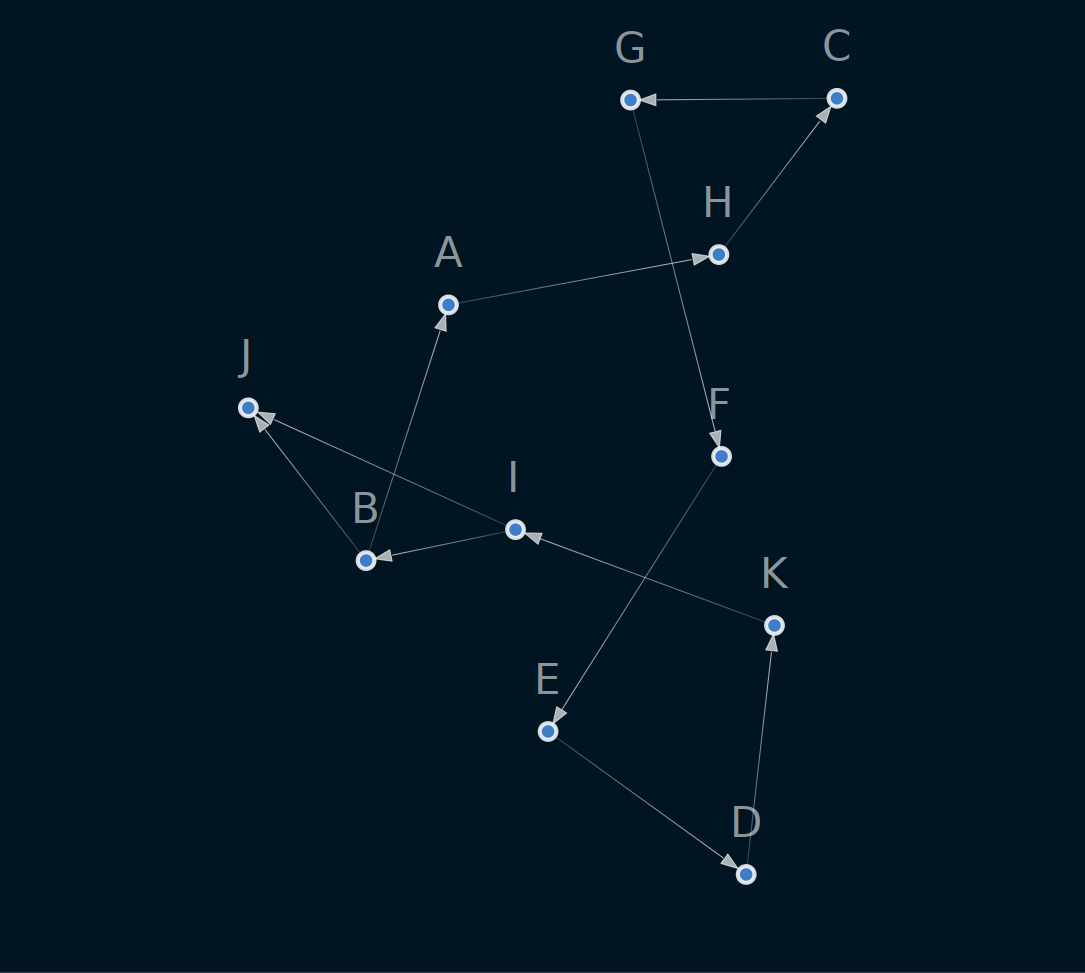

In [2]:
sm = from_pandas(data)
sm.remove_edges_below_threshold(0.5)
viz = plot_structure(
    sm,
    graph_attributes={"scale": "0.6"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
    prog='fdp',
)
Image(viz.draw(format='png'))


In [6]:
### Due to cycle We decided to remove the  edge between F and E- it has the lowest weight and 
sm.remove_edge('F', 'E')

In [5]:
sm.adj

AdjacencyView({'A': {'H': {'origin': 'learned', 'weight': 0.7261430429194714}}, 'B': {'A': {'origin': 'learned', 'weight': 0.7987501185888799}, 'J': {'origin': 'learned', 'weight': 0.5364689840138552}}, 'C': {'G': {'origin': 'learned', 'weight': 0.6451546170758357}}, 'D': {'K': {'origin': 'learned', 'weight': 0.7048880518982474}}, 'E': {'D': {'origin': 'learned', 'weight': 0.79720218357585}}, 'F': {'E': {'origin': 'learned', 'weight': 0.6404498930917519}}, 'G': {'F': {'origin': 'learned', 'weight': 0.6899589731622059}}, 'H': {'C': {'origin': 'learned', 'weight': 0.7352316917846676}}, 'I': {'B': {'origin': 'learned', 'weight': 0.7660261262980388}, 'J': {'origin': 'learned', 'weight': 0.7782916626950964}}, 'J': {}, 'K': {'I': {'origin': 'learned', 'weight': 0.7544441328422323}}})

/home/jay/miniconda3/envs/jay/lib/python3.10/site-packages/pygraphviz/agraph.py:1405: RuntimeWarning: Warning: node 'A', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)
/home/jay/miniconda3/envs/jay/lib/python3.10/site-packages/pygraphviz/agraph.py:1405: RuntimeWarning: Warning: node 'A', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


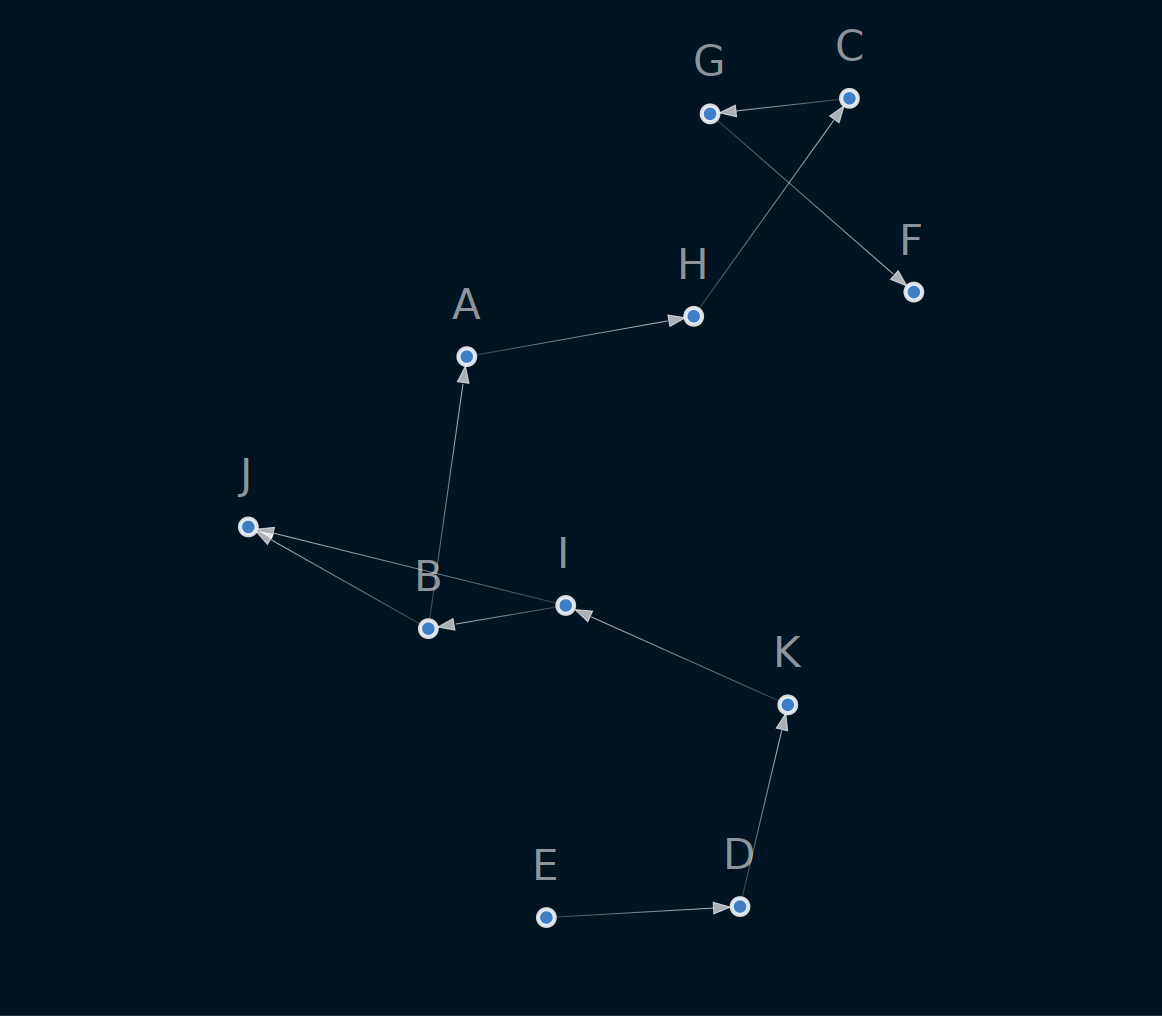

In [7]:
viz = plot_structure(
    sm,
    graph_attributes={"scale": "0.6"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
    prog='fdp',
)
Image(viz.draw(format='png'))

In [23]:
# create adjacency matrix from structure model
DF=pd.DataFrame(columns=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K'])
ll=[]
for i in sm.adjacency():
    temp={}
    for k in (i[1].keys()):
        temp[k]= i[1][k]['weight']
    ll.append(temp)
DF=DF.append(ll, ignore_index=True)

/tmp/ipykernel_10768/3170557540.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  DF=DF.append(ll, ignore_index=True)


In [27]:
DF.fillna(0).round(2).values

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.73, 0.  , 0.  , 0.  ],
       [0.8 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.54, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.65, 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.7 ],
       [0.  , 0.  , 0.  , 0.8 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.69, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.74, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.77, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.78, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.75, 0.  , 0.  ]])